In [1]:
import ultralytics

In [3]:
ultralytics.checks()

Ultralytics 8.3.161  Python-3.12.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Setup complete  (12 CPUs, 7.2 GB RAM, 24.0/138.0 GB disk)


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
!yolo predict model=yolo11n.pt source=https://images.picxy.com/cache/2019/7/25/afabbc2ca65c11152666574a3f1112e0.jpg

Ultralytics 8.3.161  Python-3.12.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 D:\Data Science by Pavan\Data Science\20.Yolo Projects\New project\afabbc2ca65c11152666574a3f1112e0.jpg: 448x640 1 person, 1 chair, 1 laptop, 83.4ms
Speed: 2.4ms preprocess, 83.4ms inference, 210.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict5
 Learn more at https://docs.ultralytics.com/modes/predict



  0%|          | 0.00/394k [00:00<?, ?B/s]
100%|##########| 394k/394k [00:00<00:00, 8.02MB/s]


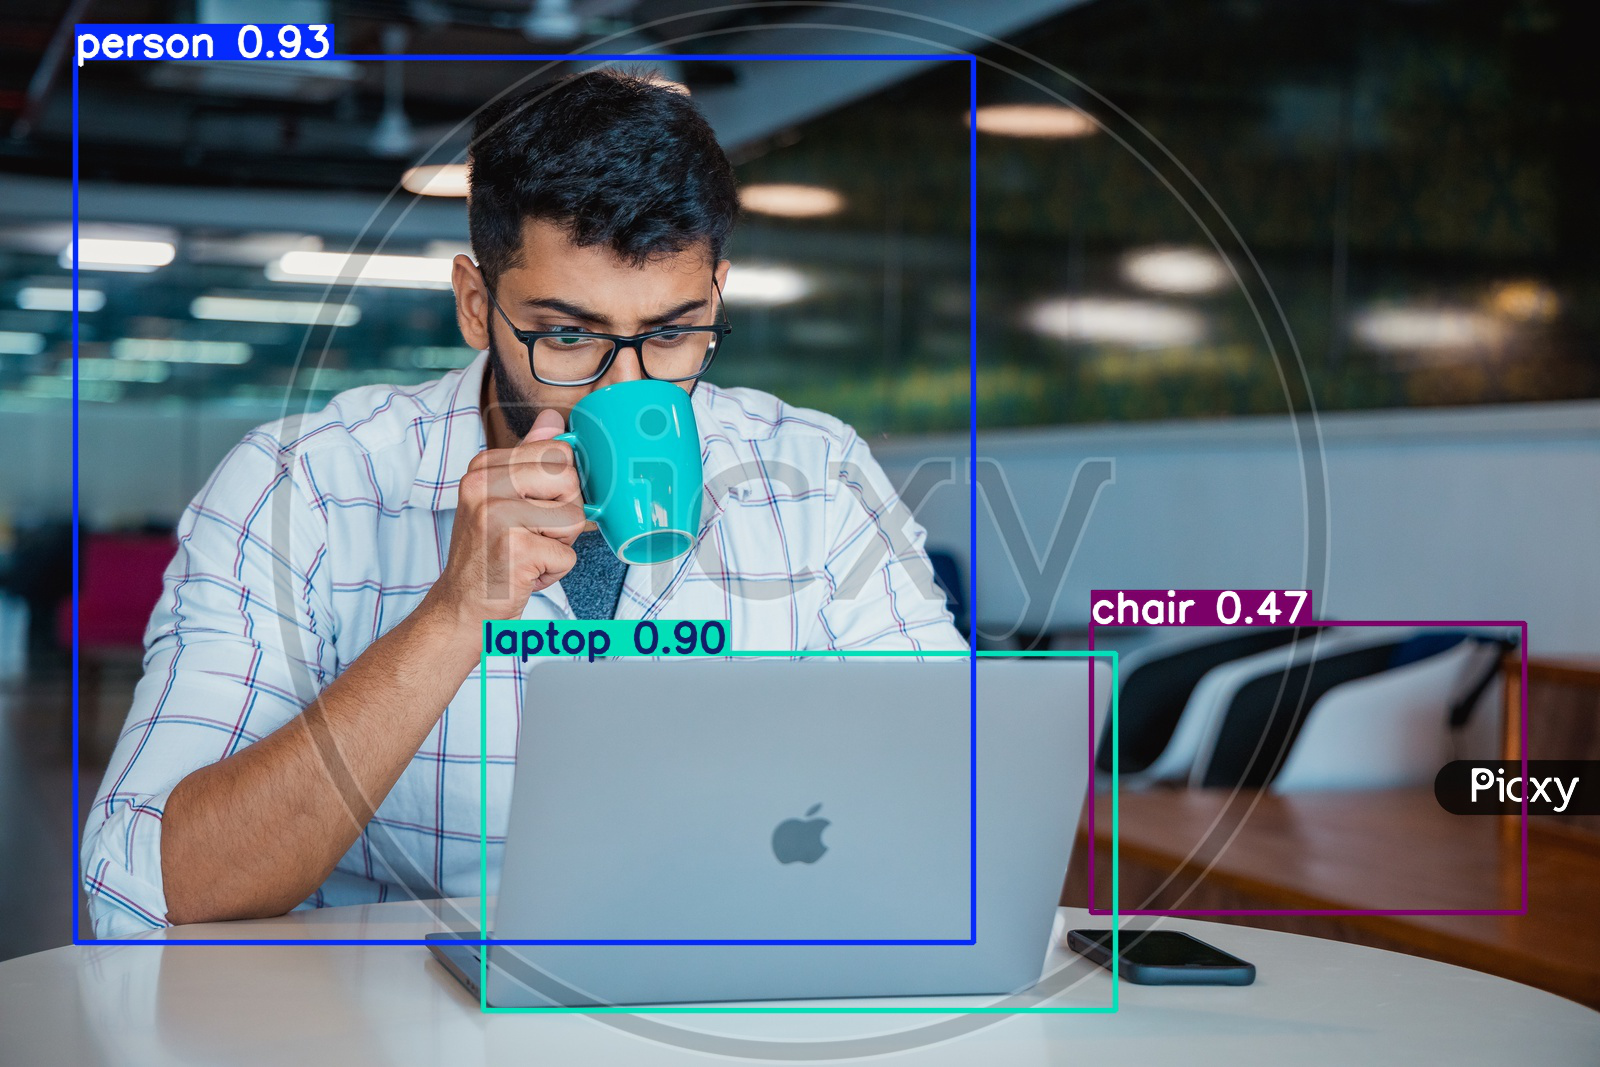

In [15]:
from PIL import Image
from IPython.display import display

# Open an image file
image = Image.open("afabbc2ca65c11152666574a3f1112e0 (2).jpg")

# Display the image
display(image)

In [41]:
# **Object Detection in a video**

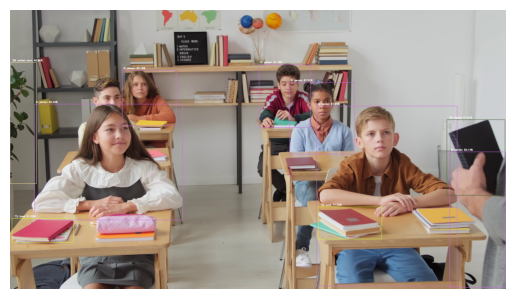

Video ended or failed, exiting...
Video ended or reached frame limit, exiting...


In [39]:
import cv2
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ultralytics import YOLO

# Load class names
with open('COCO.txt', 'r') as my_file:
    class_list = my_file.read().split("\n")

# Generate random colors
detection_colors = []
for _ in range(len(class_list)):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    detection_colors.append((b, g, r))

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Load video
cap = cv2.VideoCapture('video_sample1.mp4')
if not cap.isOpened():
    print("Cannot open video file")
    exit()

# Read and process frames
while True:
    ret, frame = cap.read()
    if not ret:
        print("Video ended or failed, exiting...")
        break

    # Predict
    detect_params = model.predict(source=[frame], conf=0.45, save=False)
    boxes = detect_params[0].boxes

    for i in range(len(boxes)):
        box = boxes[i]
        clsID = int(box.cls.cpu().numpy()[0])
        conf = box.conf.cpu().numpy()[0]
        bb = box.xyxy.cpu().numpy()[0]

        # Draw bounding box
        cv2.rectangle(
            frame,
            (int(bb[0]), int(bb[1])),
            (int(bb[2]), int(bb[3])),
            detection_colors[clsID],
            2,
        )

        # Display label
        label = f"{class_list[clsID]} {round(conf * 100, 2)}%"
        cv2.putText(
            frame, label,
            (int(bb[0]), int(bb[1]) - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6, (255, 255, 255), 2
        )

    # Display frame inline in Jupyter
    clear_output(wait=True)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

cap.release()

frame_count = 0
max_frames = 5  # Set your limit here

while True:
    ret, frame = cap.read()
    if not ret or frame_count >= max_frames:
        print("Video ended or reached frame limit, exiting...")
        break
    frame_count += 1
    ...


# **Tracking the Squats**

In [77]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load YOLOv8 pose model
model = YOLO("yolov8n-pose.pt")  # Use yolov8s-pose.pt for more accuracy

# Load video file
video_path = r"D:\Data Science by Pavan\Data Science\20.Yolo Projects\New project\squats.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Set frame size
frame_width = 960
frame_height = 540
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Prepare to save output video
output_path = r"D:\Data Science by Pavan\Data Science\20.Yolo Projects\New project\squats_output.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use 'mp4v' for .mp4
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Skeleton pairs (COCO format)
skeleton = [
    (5, 7), (7, 9),     # Left arm
    (6, 8), (8, 10),    # Right arm
    (5, 6),             # Shoulders
    (11, 12),           # Hips
    (5, 11), (6, 12),   # Torso
    (11, 13), (13, 15), # Left leg
    (12, 14), (14, 16)  # Right leg
]

# Squat counting variables
squat_count = 0
direction = None
hip_positions = []

while True:
    ret, frame = cap.read()
    if not ret:
        print("✅ Video processing complete.")
        break

    # Resize for laptop display
    frame = cv2.resize(frame, (frame_width, frame_height))

    # Run pose detection
    results = model.predict(frame, conf=0.5, save=False)
    keypoints = results[0].keypoints

    if keypoints is not None and len(keypoints) > 0:
        for kp in keypoints.data:
            kpts = kp.cpu().numpy()

            # Draw skeleton
            for pair in skeleton:
                pt1 = kpts[pair[0]]
                pt2 = kpts[pair[1]]
                if pt1[2] > 0.5 and pt2[2] > 0.5:
                    cv2.line(frame,
                             (int(pt1[0]), int(pt1[1])),
                             (int(pt2[0]), int(pt2[1])),
                             (0, 255, 0), 2)

            # Draw keypoints
            for x, y, conf in kpts:
                if conf > 0.5:
                    cv2.circle(frame, (int(x), int(y)), 4, (0, 0, 255), -1)

            # Squat logic using hip movement
            left_hip_y = kpts[11][1]
            right_hip_y = kpts[12][1]
            hip_y = (left_hip_y + right_hip_y) / 2

            # Track recent hip positions
            hip_positions.append(hip_y)
            if len(hip_positions) > 5:
                hip_positions.pop(0)

            # Detect squat movement direction
            if len(hip_positions) >= 2:
                movement = np.mean(np.diff(hip_positions))

                if movement > 2 and direction != "down":
                    direction = "down"

                elif movement < -2 and direction == "down":
                    direction = "up"
                    squat_count += 1

            # Display squat count
            cv2.putText(frame, f"Squats: {squat_count}", (20, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)

    # Show frame
    cv2.imshow("Squat Counter", frame)

    # Save frame to output video
    out.write(frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("❌ Stopped manually.")
        break

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"🎥 Output saved to: {output_path}")
print(f"✅ Total squats counted: {squat_count}")



0: 384x640 1 person, 75.3ms
Speed: 5.7ms preprocess, 75.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 44.3ms
Speed: 1.9ms preprocess, 44.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.9ms
Speed: 1.7ms preprocess, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 38